In [89]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [90]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [91]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [92]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [93]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(june_results)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [148]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['June Precipitation'])
june_df

,June Precipitation
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [149]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Precipitation
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [133]:
june_results2 = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(june_results2)

[(0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.07,), (0.0,), (0.56,), (0.89,), (0.0,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.05,), (0.06,), (0.07,), (None,), (0.0,), (0.0,), (0.01,), (0.01,), (0.0,), (0.02,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (None,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.15,), (0.01,), (0.0,), (0.05,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.37,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.04,), (0.12,), (0.04,), (0.02,), (0.35,), (0.03,), (0.01,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.66,), (0.01,), (0.0,), (0.0

In [135]:
june_df2 = pd.DataFrame(june_results2, columns=['June Percipitation'])
june_df2

,June Percipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


In [137]:
june_df2.describe()

,June Percipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [138]:
Q1 = june_df2.quantile(0.25)
Q3 = june_df2.quantile(0.75)
IQR = Q3-Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 - 1.5 * IQR

print(lower_lim)
print(upper_lim)

June Percipitation   -0.18
dtype: float64
June Percipitation   -0.06
dtype: float64


In [ ]:
high_outliers = june_df2.loc[december_df['December Temperatures'] < 66.5]
print(high_outliers)

## D2: Determine the Summary Statistics for December

In [96]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()


[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [97]:
# 7. Convert the December temperatures to a list.
december_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(december_results)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [116]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_results, columns=['December Temperatures'])
december_df

,December Temperatures
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [99]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [145]:
december_results2 = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
print(december_results2)

[(0.04,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (1.58,), (0.77,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (1.4,), (0.0,), (0.0,), (None,), (0.13,), (0.55,), (0.06,), (0.01,), (0.0,), (0.03,), (0.08,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.13,), (0.07,), (0.07,), (0.08,), (0.4,), (0.7,), (0.0,), (0.01,), (0.07,), (0.02,), (0.15,), (0.02,), (0.18,), (0.03,), (0.04,), (0.1,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.2,), (0.01,), (None,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.14,), (0.09,), (0.01,), (0.02,), (0.02,), (0.12,), (0.0,), (0.1,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.04,), (0.0,), (2.01,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (1.1,), (0.02,), (0.0,), (0.16,), (0.09,), (0.02,), (0.0,), (0.0,), (0.05,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (

In [146]:
december_df2 = pd.DataFrame(december_results2, columns=['December Precipitation'])
december_df2

,December Percipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


In [147]:
december_df2.describe()

,December Percipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


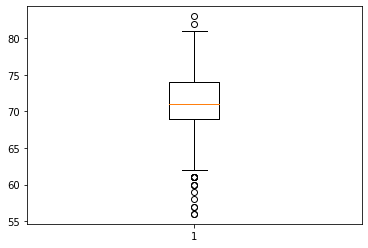

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(december_df)
plt.show()

In [130]:
Q1 = december_df.quantile(0.25)
Q3 = december_df.quantile(0.75)
IQR = Q3-Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 - 1.5 * IQR

print(lower_lim)
print(upper_lim)

December Temperatures    61.5
dtype: float64
December Temperatures    66.5
dtype: float64


In [129]:
low_outliers = december_df.loc[december_df['December Temperatures'] < 61.5]
print(low_outliers)

      December Temperatures
141                    61.0
147                    56.0
737                    61.0
885                    56.0
947                    61.0
948                    58.0
949                    60.0
1075                   61.0
1090                   60.0
1096                   59.0
1242                   61.0
1308                   57.0
1310                   57.0
1316                   61.0
1502                   60.0


In [132]:
high_outliers = december_df.loc[december_df['December Temperatures'] < 66.5]
print(high_outliers)

      December Temperatures
3                      64.0
4                      64.0
7                      66.0
14                     66.0
55                     63.0
...                     ...
1498                   65.0
1501                   64.0
1502                   60.0
1515                   65.0
1516                   65.0

[170 rows x 1 columns]


170